170498071/170498071 [==============================] - 23s 0us/step
Epoch 1/10
1563/1563 [==============================] - 52s 29ms/step - loss: 1.4687 - accuracy: 0.4662 - val_loss: 1.1570 - val_accuracy: 0.5876
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0879 - accuracy: 0.6174 - val_loss: 1.0516 - val_accuracy: 0.6316
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9130 - accuracy: 0.6830 - val_loss: 0.9386 - val_accuracy: 0.6732
Epoch 4/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.8006 - accuracy: 0.7199 - val_loss: 0.8754 - val_accuracy: 0.6989
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7137 - accuracy: 0.7510 - val_loss: 0.8347 - val_accuracy: 0.7136
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6392 - accuracy: 0.7780 - val_loss: 0.8247 - val_accuracy: 0.7212
Epoch 7/10
1563/1563 [==============================] - 

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


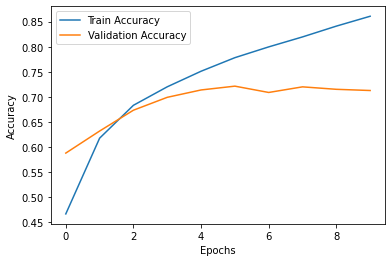

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

# Save the model
model.save("cnn_cifar10_model.h5")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
